In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import sounddevice as sd
import winsound
from scipy.io.wavfile import write
import soundfile as sf
import peakutils

In [6]:
def generateSin(freq, time, fs):
        n = time*fs #numero de pontos
        x = np.linspace(0.0, time, n)  # eixo do tempo
        s = np.sin(freq*x*2*np.pi)
        return (x, s)

In [7]:
def calcFFT(signal, fs):
        # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
        #y  = np.append(signal, np.zeros(len(signal)*fs))
        N  = len(signal)
        T  = 1/fs
        xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
        yf = fft(signal)
        return(xf, fftshift(yf))

In [8]:
def plotFFT(self, signal, fs):
        x,y = self.calcFFT(signal, fs)
        plt.figure()
        plt.plot(x, np.abs(y))
        plt.title('Fourier')

In [9]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 120.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

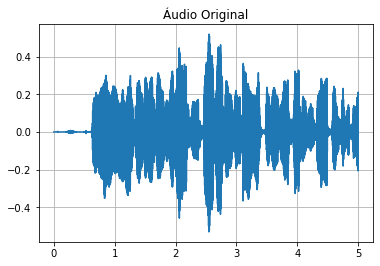

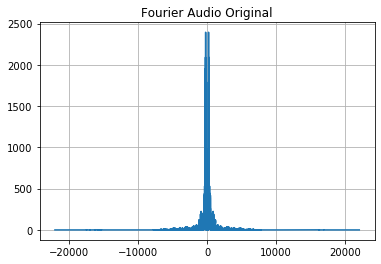


-------------------------------------------------------------------



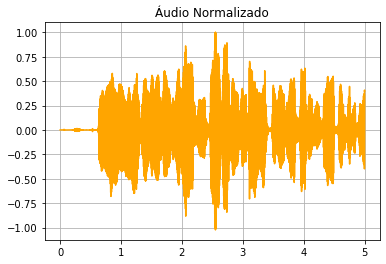

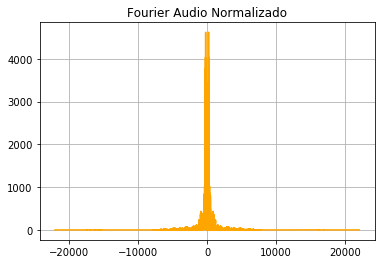


-------------------------------------------------------------------



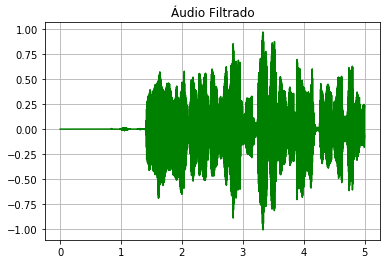

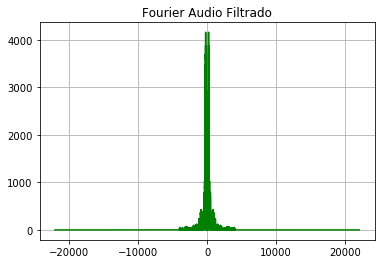


-------------------------------------------------------------------



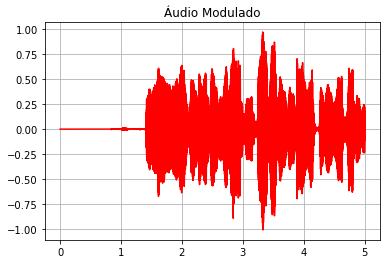

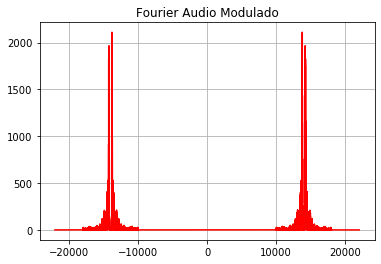


-------------------------------------------------------------------



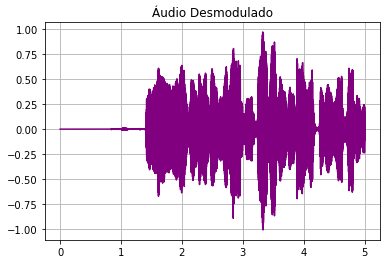

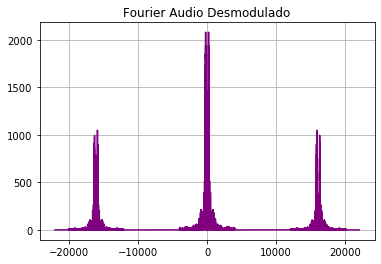

In [53]:
fs = 44100
F = 1
T = 1
sd.default.samplerate = fs
sd.default.channels = 1

# Leitura do arquivo
audio, samplerate = sf.read('teste2.wav')
yAudio = audio[:,1]
samplesAudio = len(yAudio)
sd.wait()
t = np.linspace(0, samplesAudio/fs, samplesAudio)

X, Y = calcFFT(yAudio, samplerate)

plt.plot(t, yAudio)
plt.grid()
plt.title("Áudio Original")
plt.show()

plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio Original')
plt.show()

sd.play(yAudio)
sd.wait()

print('\n-------------------------------------------------------------------\n')

# Normalização do sinal. Para nos certificar de que as amplitudes fiquem dentro do intervalo [-1,1], multiplicamos por 1/amplitudeMáxima
maxA = max(yAudio)

normSig = []
for signal in yAudio:
    normSig.append(signal/maxA)

X, Y = calcFFT(normSig, samplerate)

plt.plot(t, normSig, 'orange')
plt.grid()
plt.title('Áudio Normalizado')
plt.show()

plt.plot(X, np.abs(Y), 'orange')
plt.grid()
plt.title('Fourier Audio Normalizado')
plt.show()

sd.play(normSig)
sd.wait()

print('\n-------------------------------------------------------------------\n')

# Filtrando o áudio através da função LPF
filt = LPF(normSig, 4000, fs)

X, Y = calcFFT(filt, samplerate)

plt.plot(t, filt, 'green')
plt.grid()
plt.title('Áudio Filtrado')
plt.show()

plt.plot(X, np.abs(Y), 'green')
plt.grid()
plt.title('Fourier Audio Filtrado')
plt.show()

sd.play(filt)
sd.wait()

print('\n-------------------------------------------------------------------\n')

# Modulação do sinal com portadora de 14000 Hz
p = 14000
port = np.cos(2*np.pi*p*t)
mod = filt*port

X, Y = calcFFT(mod, samplerate)

plt.plot(t, mod, 'red')
plt.grid()
plt.title('Áudio Modulado')
plt.show()

plt.plot(X, np.abs(Y), 'red')
plt.grid()
plt.title('Fourier Audio Modulado')
plt.show()

sd.play(mod)
sd.wait()

print('\n-------------------------------------------------------------------\n')

# Desmodulando o sinal
desmod = port*mod
X, Y = calcFFT(desmod, samplerate)

plt.plot(t, mod, 'purple')
plt.grid()
plt.title('Áudio Desmodulado')
plt.show()

plt.plot(X, np.abs(Y), 'purple')
plt.grid()
plt.title('Fourier Audio Desmodulado')
plt.show()

sd.play(desmod)
sd.wait()